In [22]:
pip install opencv-python numpy pandas matplotlib torch torchvision torchsummary


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd

# Load radar data
df_radar = pd.read_csv("C:/Users/sande/JN/Dataset_ox/gt/radar_odometry.csv")
print(df_radar.head())  # View first few rows


   source_timestamp  destination_timestamp         x         y    z  roll  \
0  1547131014730417       1547131014477724  0.000269 -0.000270 -0.0  -0.0   
1  1547131014983426       1547131014730417  0.001167 -0.000100 -0.0   0.0   
2  1547131015235031       1547131014983426  0.000985  0.000290 -0.0  -0.0   
3  1547131015484492       1547131015235031  0.001502  0.000346 -0.0  -0.0   
4  1547131015732199       1547131015484492 -0.002200 -0.001113 -0.0   0.0   

   pitch       yaw  source_radar_timestamp  destination_radar_timestamp  
0   -0.0  0.000011        1547131014603839             1547131014351772  
1   -0.0 -0.000012        1547131014857246             1547131014603839  
2   -0.0 -0.000000        1547131015109865             1547131014857246  
3   -0.0 -0.000020        1547131015360474             1547131015109865  
4    0.0  0.000119        1547131015608777             1547131015360474  


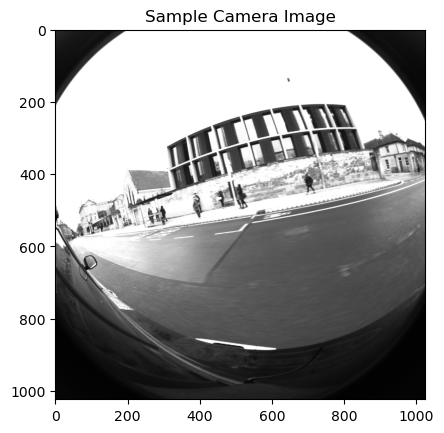

In [24]:
import cv2
import glob
import matplotlib.pyplot as plt

# Path to camera images
camera_images = sorted(glob.glob(r"C:\Users\sande\JN\Dataset_ox\stereo\centre\*.png"))

# Verify if images are found
if not camera_images:
    print("No images found! Check the dataset path.")
else:
    # Load and display the first image
    image = cv2.imread(camera_images[0])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title("Sample Camera Image")
    plt.show()


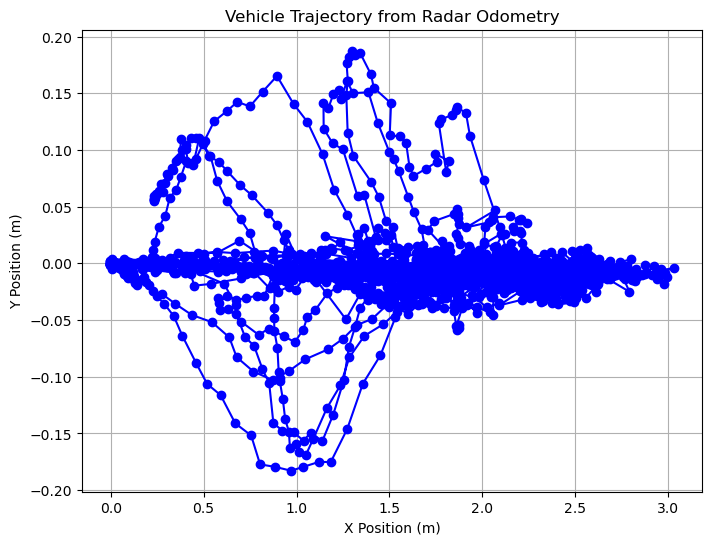

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load radar odometry dataset
radar_file_path = ("C:/Users/sande/JN/Dataset_ox/gt/radar_odometry.csv")
df_radar = pd.read_csv(radar_file_path)

# Plot vehicle movement over time
plt.figure(figsize=(8, 6))
plt.plot(df_radar['x'], df_radar['y'], marker='o', linestyle='-', color='b')
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Vehicle Trajectory from Radar Odometry")
plt.grid()
plt.show()


In [27]:
!pip install ultralytics


Defaulting to user installation because normal site-packages is not writeable


In [28]:
from ultralytics import YOLO

# Load YOLOv10 model
model = YOLO("yolov10s.pt")  # Pre-trained YOLOv10 model

# Run object detection on the first image
if camera_images:
    results = model(camera_images[0])
    results[0].show()  # Show detected objects



image 1/1 C:\Users\sande\JN\Dataset_ox\stereo\centre\1547131046300383.png: 640x640 7 persons, 1 skateboard, 484.8ms
Speed: 11.1ms preprocess, 484.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


In [29]:
def analyze_motion(df_radar):
    # Calculate speed from position changes
    df_radar["speed"] = ((df_radar["x"].diff())**2 + (df_radar["y"].diff())**2)**0.5
    
    # If speed exceeds a threshold, it might indicate sudden braking or an obstacle
    df_radar["sudden_change"] = df_radar["speed"] > 0.5  # Example threshold
    
    return df_radar

# Apply motion analysis
df_radar = analyze_motion(df_radar)

# Display sudden changes
sudden_changes = df_radar[df_radar["sudden_change"]]
print("⚠️ Sudden movement detected at:\n", sudden_changes)


⚠️ Sudden movement detected at:
 Empty DataFrame
Columns: [source_timestamp, destination_timestamp, x, y, z, roll, pitch, yaw, source_radar_timestamp, destination_radar_timestamp, speed, sudden_change]
Index: []


In [31]:
def detect_collision(radar_df):
    for index, row in radar_df.iterrows():
        if row["sudden_change"]:
            print(f"🚨 Warning! Sudden motion detected at timestamp {row['source_timestamp']}")

# Run collision detection
detect_collision(df_radar)


Action Taken: Safe


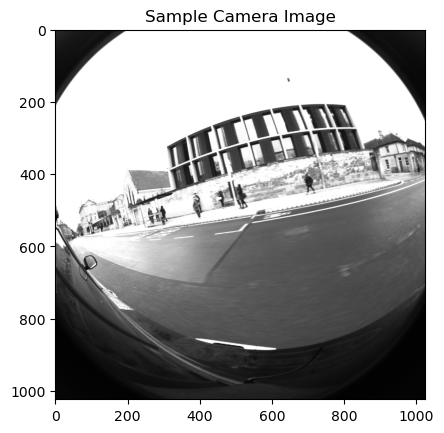


image 1/1 C:\Users\sande\JN\Dataset_ox\stereo\centre\1547131046300383.png: 640x640 7 persons, 1 skateboard, 499.4ms
Speed: 10.4ms preprocess, 499.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

🚀 Efficiency Improvements:
1️⃣ Sensor Fusion: Improve accuracy by better aligning radar & camera data.
2️⃣ Faster Object Detection: Optimize YOLO model using ONNX or TensorRT.
3️⃣ Real-time Processing: Implement multi-threading for ADAS real-time response.


In [34]:
import pandas as pd
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load radar odometry dataset
radar_file_path = ("C:/Users/sande/JN/Dataset_ox/gt/radar_odometry.csv")
df_radar = pd.read_csv(radar_file_path)

# Calculate speed from position changes
df_radar["speed"] = np.sqrt(df_radar["x"].diff()**2 + df_radar["y"].diff()**2)

def detect_collision(radar_df, speed_threshold=0.5):
    """Detect sudden movement and trigger braking or lane change."""
    for index, row in radar_df.iterrows():
        if row["speed"] > speed_threshold:
            print(f"🚨 Warning! Sudden movement detected at {row['source_timestamp']}")
            print("Activating Emergency Braking!")
            return "Brake"
    return "Safe"

# Run collision detection
action = detect_collision(df_radar)
print("Action Taken:", action)

# Load camera images
camera_images = sorted(glob.glob(r"C:\Users\sande\JN\Dataset_ox\stereo\centre\*.png"))
if not camera_images:
    print("No camera images found! Check dataset path.")
else:
    image = cv2.imread(camera_images[0])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title("Sample Camera Image")
    plt.show()

# Load YOLOv10 model
model = YOLO("yolov10s.pt")  # Pre-trained YOLO model
if camera_images:
    results = model(camera_images[0])
    results[0].show()  # Show detected objects

# Improvements:
print("\n🚀 Efficiency Improvements:")
print("1️⃣ Sensor Fusion: Improve accuracy by better aligning radar & camera data.")
print("2️⃣ Faster Object Detection: Optimize YOLO model using ONNX or TensorRT.")
print("3️⃣ Real-time Processing: Implement multi-threading for ADAS real-time response.")